In [93]:
import pickle

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm

In [94]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [95]:
IN_DIR = "E:\\M2\\result\\20221028\\"
OUT_DIR = "E:\\M2\\result\\20221028\\"
sub_dir_list = [
    "dual_1_low\\1\\",
    "dual_1_low\\2\\",
    "dual_1_low\\3\\",
    "dual_1_low\\4\\",
    "dual_1_low\\5\\",
    "dual_1_low\\6\\",
]
sub_dir_list2 = [
    "dual_1\\1\\",
    "dual_1\\2\\",
    "dual_1\\3\\",
    "dual_1\\4\\",
    "dual_1\\5\\",
    "dual_1\\6\\",
]

In [96]:
time_table = pd.read_csv("time1.csv", header=None, index_col=0)
time_table = time_table.values.astype(np.int64)

In [97]:
ptv_result = np.zeros((1, 6))
ptv_result2 = np.zeros((1, 6))

In [98]:
for d in range(5, 6):
    for i in tqdm(range(0, 10900)):
        for j in range(21):
            if time_table[d, 2 * j] <= i < time_table[d, 2 * j + 1]:
                try:
                    tmp = np.loadtxt(OUT_DIR + "ptv\\" + sub_dir_list[d] + f"pp_{i}.csv", delimiter=',', skiprows=1)
                except StopIteration:
                    tmp = None
                except OSError:
                    tmp = None

                if tmp is None:
                    pass
                elif tmp.ndim == 1:
                    if len(tmp) > 0:
                        tmp = tmp[np.newaxis, :]
                    else:
                        tmp = None
                elif tmp.ndim == 2:
                    pass
                else:
                    tmp = None

                if tmp is None:
                    pass
                else:
                    ptv_result = np.vstack([ptv_result, tmp])

100%|██████████| 10900/10900 [00:39<00:00, 279.41it/s]


In [99]:
for d in range(5, 6):
    for i in tqdm(range(0, 10900)):
        for j in range(21):
            if time_table[d, 2 * j] <= i < time_table[d, 2 * j + 1]:
                try:
                    tmp = np.loadtxt(OUT_DIR + "ptv\\" + sub_dir_list2[d] + f"pp_{i}.csv", delimiter=',', skiprows=1)
                except StopIteration:
                    tmp = None
                except OSError:
                    tmp = None

                if tmp is None:
                    pass
                elif tmp.ndim == 1:
                    if len(tmp) > 0:
                        tmp = tmp[np.newaxis, :]
                    else:
                        tmp = None
                elif tmp.ndim == 2:
                    pass
                else:
                    tmp = None

                if tmp is None:
                    pass
                else:
                    ptv_result2 = np.vstack([ptv_result2, tmp])

100%|██████████| 10900/10900 [00:39<00:00, 274.39it/s]


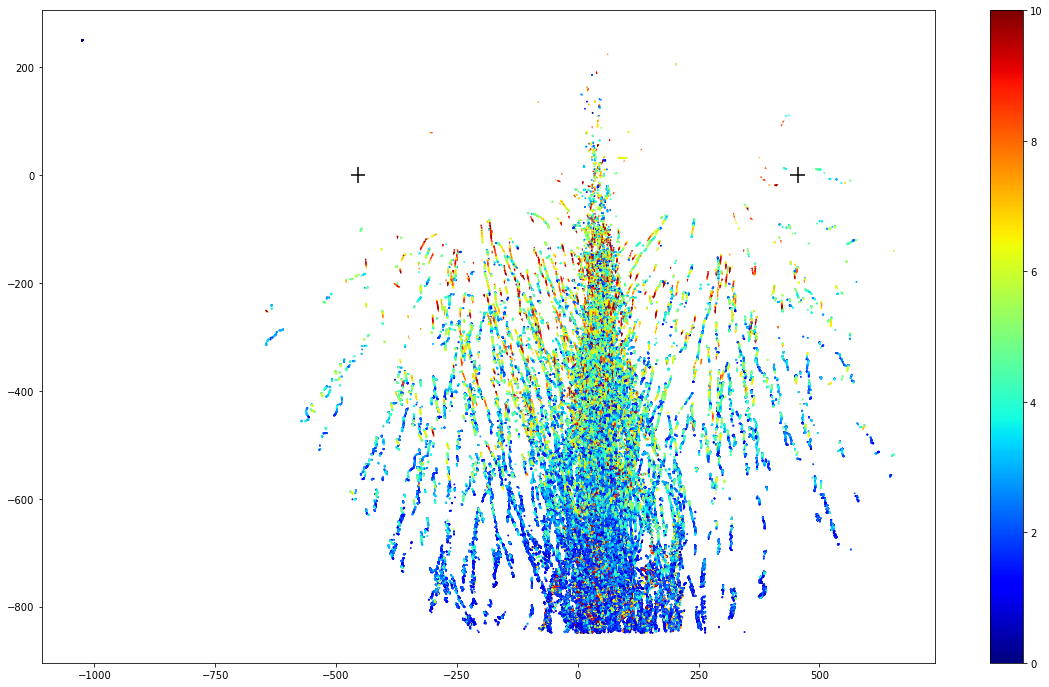

In [100]:
fig, ax = plt.subplots(figsize=(20, 12))
# plt.xlim(-1025, 975)
# plt.ylim(-1050, 250)
ax.hlines(0, -440, -470, color='k')
ax.vlines(-455, -15, 15, color='k')
ax.hlines(0, 440, 470, color='k')
ax.vlines(455, -15, 15, color='k')

c = ax.quiver(ptv_result[:, 0]-1025, -ptv_result[:, 1]+250, ptv_result[:, 2], -ptv_result[:, 3], np.sqrt(ptv_result[:, 2]**2 + ptv_result[:, 3]**2), cmap="jet")

fig.colorbar(c)
plt.show()

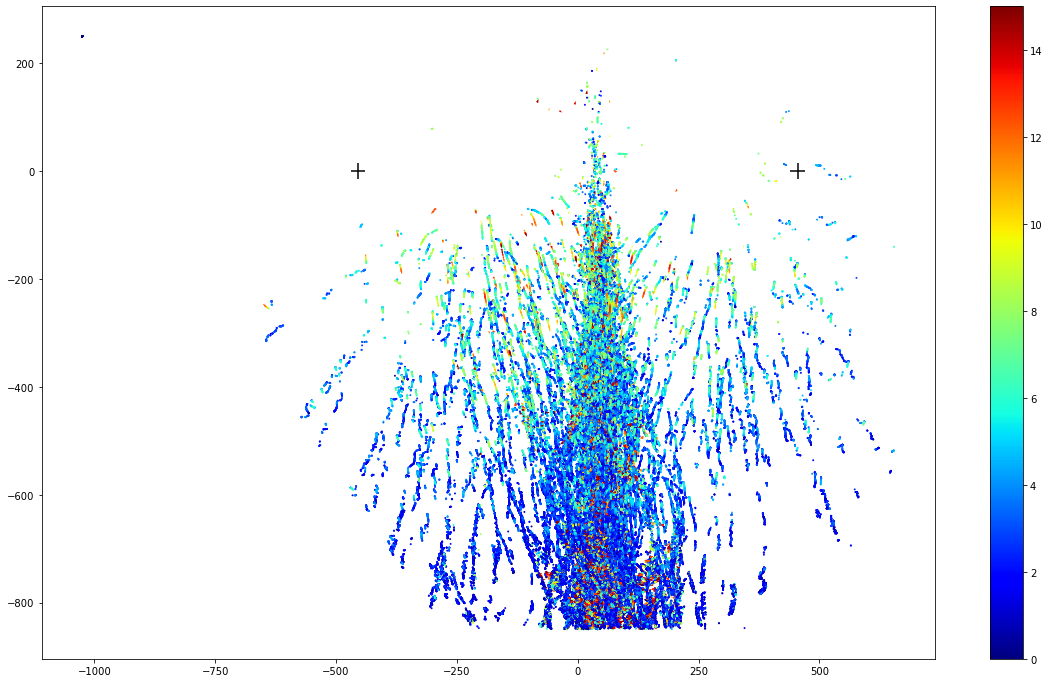

In [101]:
fig, ax = plt.subplots(figsize=(20, 12))
# plt.xlim(-1025, 975)
# plt.ylim(-1050, 250)
ax.hlines(0, -440, -470, color='k')
ax.vlines(-455, -15, 15, color='k')
ax.hlines(0, 440, 470, color='k')
ax.vlines(455, -15, 15, color='k')

c = ax.quiver(ptv_result2[:, 0]-1025, -ptv_result2[:, 1]+250, ptv_result2[:, 2], -ptv_result2[:, 3], np.sqrt(ptv_result2[:, 2]**2 + ptv_result2[:, 3]**2), cmap="jet")

fig.colorbar(c)
plt.show()

In [102]:
# ptv_result = pd.DataFrame(ptv_result, columns=['x', 'y', 'dx', 'dy', 'p0', 'p1'])
# for row in tqdm(ptv_result.index):
#     if (ptv_result.loc[row] == 0).all():
#         ptv_result.drop(row, axis=0, inplace=True)

In [103]:
# ptv_result2 = pd.DataFrame(ptv_result2, columns=['x', 'y', 'dx', 'dy', 'p0', 'p1'])
# for row in tqdm(ptv_result2.index):
#     if (ptv_result2.loc[row] == 0).all():
#         ptv_result2.drop(row, axis=0, inplace=True)

In [104]:
# with open(f'ptv_result_large_low1.pickle', mode='wb') as fp:
#     pickle.dump(ptv_result, fp)

In [105]:
# with open(f'ptv_result_large_high1.pickle', mode='wb') as fp:
#     pickle.dump(ptv_result2, fp)